<a href="https://colab.research.google.com/github/Michwynn/Capstone-Team-Air-/blob/Data-Cleaning/Recommended_vs_Actual_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # supress warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Capstone

pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Capstone


**Read Calendar datasets**

In [3]:
df = pd.read_csv('assets/raw_assets/calendar.csv')

# cleaning price cols
for col in ['price', 'adjusted_price']:
  df[col] = df[col].str.replace('$', '') 
  df[col] = df[col].str.replace(',', '') 
  df[col] = df[col].astype(float)

In [27]:
# group by listing_id and then get the mean of actual vs recommended prices across time
df = df.groupby(['listing_id'])['price', 'adjusted_price'].mean().reset_index()

# we can try with median prices too, correlation is almost perfect (=1)
#df = df.groupby(['listing_id'])['price', 'adjusted_price'].mean().reset_index()

**Find the correlation between what prices were actually rented vs recommended by airbnb smart pricing tool**

In [28]:
# plot correlation matrix
corr = df.drop('listing_id', axis=1).corr()
corr.style.background_gradient(cmap='YlOrRd')

,price,adjusted_price
price,1.000000,0.999897
adjusted_price,0.999897,1.000000


**Scatterplot**

Text(0.5, 1.0, 'Airbnb Prices vs Recommended Prices')

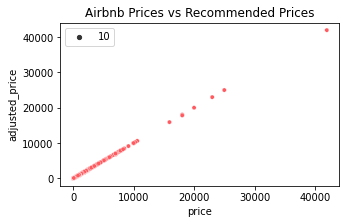

In [29]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=df, x="price", y="adjusted_price", color = '#FF5A5F').set_title('Airbnb Prices vs Recommended Prices')

**Conclusion:**

Since hosts are mostly "well-behaved", meaning they actually follow or trust the airbnb smart pricing tool, we will take the target variable as the actual prices that were rented out. Hence, any poor fit of a model to predict price cannot be attributed to random pricing behavioural of hosts. This holds true for both mean and median prices across time for each listing_id.